In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import mistery

np.random.seed(42) # for reproducibility 

In [2]:
# some statements to make the figures look nicer 
%config InlineBackend.figure_format='retina'
plt.rcParams.update({'axes.linewidth' : 1,
                     'ytick.major.width' : 1,
                     'ytick.minor.width' : 1,
                     'xtick.major.width' : 1,
                     'xtick.minor.width' : 1,
                     'xtick.labelsize': 10, 
                     'ytick.labelsize': 10,
                     'axes.labelsize': 12,
                     'font.family': 'Serif',
                     'figure.figsize': (4, 3.8)
                    })

In [3]:
track = pd.DataFrame(mistery.get_track(M=2.0, FeH=0))
track25 = pd.DataFrame(mistery.get_track(M=2.5, FeH=0))
track3 = pd.DataFrame(mistery.get_track(M=3.0, FeH=0))
track33 = pd.DataFrame(mistery.get_track(M=3.3, FeH=0))
track4 = pd.DataFrame(mistery.get_track(M=4.0, FeH=0))
track8 = pd.DataFrame(mistery.get_track(M=8.0, FeH=0))

In [149]:
track1 = pd.DataFrame(mistery.get_track(M=1.0, FeH=0))

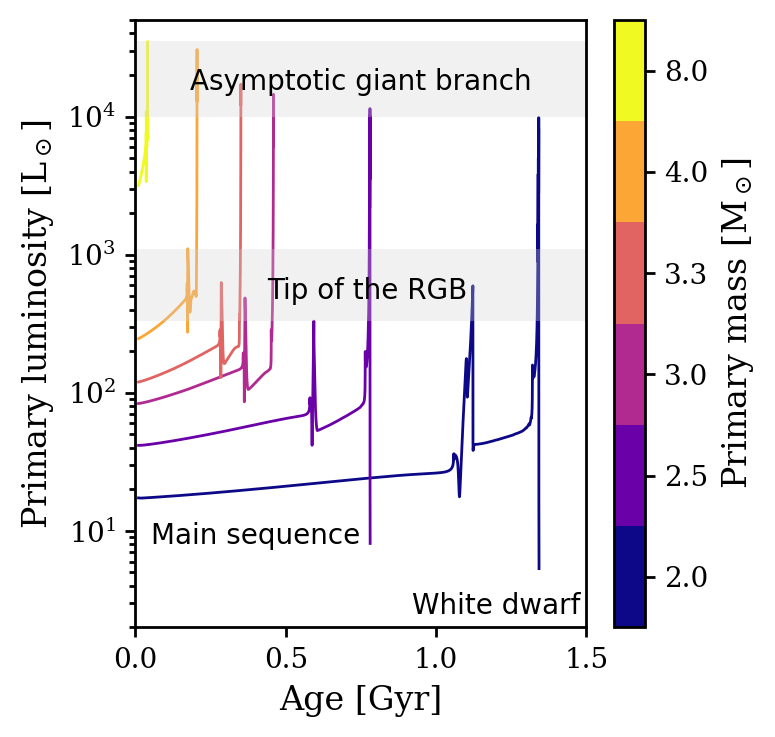

In [62]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, BoundaryNorm

tracks = [(track, 2.0), (track25, 2.5), (track3, 3.0), (track33, 3.3), (track4, 4.0), (track8, 8.0)]

tracks_sorted = sorted(tracks, key=lambda x: x[1])
masses = [mass for (t, mass) in tracks_sorted]
n_colors = len(tracks_sorted)

cmap = plt.cm.plasma
colors = cmap(np.linspace(0, 1, n_colors))
cmap_discrete = ListedColormap(colors)

boundaries = np.linspace(-0.5, n_colors - 0.5, n_colors + 1)
norm = BoundaryNorm(boundaries, ncolors=cmap_discrete.N)

mass_to_index = {mass: idx for idx, mass in enumerate(masses)}

for t, mass in tracks_sorted:
    idx = t.star_age > 1e7
    index = mass_to_index[mass]
    color = cmap_discrete(norm(index))
    plt.plot(t.star_age[idx] / 1e9, 10**t.log_L[idx], color=color, lw=1, zorder=-999)

plt.axhspan(1e4, 3.5e4, color='lightgray', zorder=-999, alpha=0.3, lw=0)
plt.text(1.5/2, 1.55e4, "Asymptotic giant branch", family='Sans', ha='center', zorder=999)

plt.axhspan(3.3e2, 1.1e3, color='lightgray', zorder=-999, alpha=0.3, lw=0)
plt.text(1.5/2+0.02, 4.8e2, "Tip of the RGB", family='Sans', ha='center', zorder=999)

plt.semilogy()
plt.xlabel('Age [Gyr]')
plt.ylabel(r'Primary luminosity [L$_\odot$]')
plt.xlim([0, 1.5])
plt.ylim([2, 5e4])

plt.text(0.05, 8, 'Main sequence', family='Sans')
plt.text(1.48, 2.5, 'White dwarf', family='Sans', ha='right')

sm = cm.ScalarMappable(cmap=cmap_discrete, norm=norm)
sm.set_array([])

tick_locs = np.arange(n_colors)

cbar = plt.colorbar(sm, ax=plt.gca(), boundaries=boundaries, ticks=tick_locs)
cbar.set_label(r'Primary mass [M$_\odot$]')

cbar.ax.set_yticklabels([str(mass) for mass in masses])
cbar.ax.minorticks_off()

plt.tight_layout()
plt.savefig('trgb.pdf')

In [148]:
for t, mass in tracks_sorted:
    ages = t[t.log_L > 4].star_age/1e5
    print(mass, np.max(ages) - np.min(ages))

2.0 nan
2.5 2.221230583769284
3.0 4.156985954775337
3.3 2.4193411540104535
4.0 1.459580240670448
8.0 42.49170220999241


In [9]:
from astropy import units as u
from astropy import constants as c

In [78]:
A = 0.33

((( (1-A) / (4*c.sigma_sb) * (u.Lsun/(4*np.pi*u.au**2)) )**(1/4))/ u.K - 273.15).value

-21.336749596796096

In [88]:
(( (1-A) / (4*c.sigma_sb) * 1.06*(u.Lsun/(4*np.pi*u.au**2)) )**(1/4)).to(u.K)

<Quantity 255.5083193 K>

In [80]:
rg = ((( (1-A) / (4*c.sigma_sb) * 1.06*(u.Lsun/(4*np.pi*u.au**2)) )**(1/4))/ u.K - 273.15).value
rg

-17.64168069714941

In [117]:
mg = ((( (1-A) / (4*c.sigma_sb) * 1.015*(u.Lsun/(4*np.pi*u.au**2)) )**(1/4))/ u.K - 273.15).value
mg

-20.39771559025229

In [70]:
Lsun = 3.826*10**26 # W 
sigma = 5.669*10**-8 # W m-2 K-4 
A = 0.33 
au = 1.496*10**11 # m 
Tearth_0 = ( (1-A)/(4*sigma) * (Lsun/(4*np.pi*au**2)) )**(1/4) - 273.15
Tearth_0

-21.356179639265065

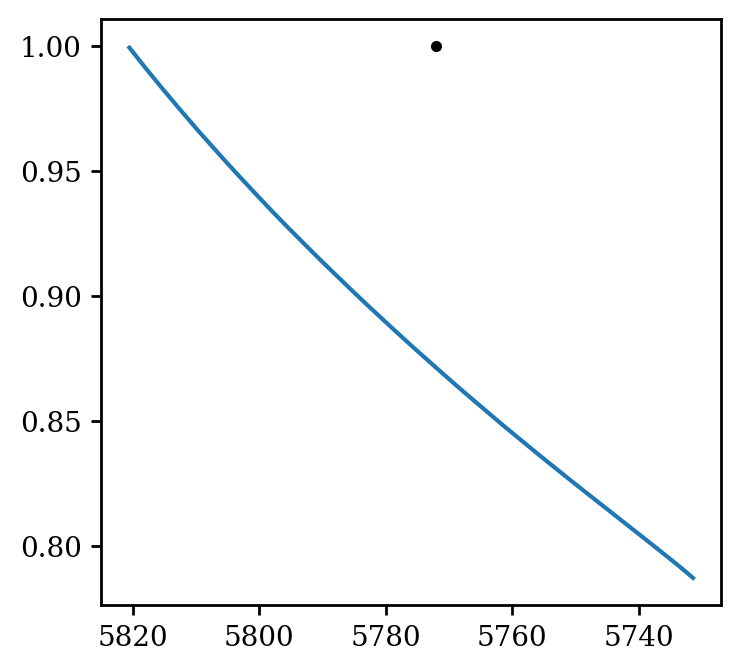

In [165]:
idx = (track1.star_age < 3.5e9) & (track1.center_h1 < 0.7)
plt.plot(10**track1.log_Teff[idx], 10**track1.log_L[idx])
plt.plot(5772, 1, 'k.')
plt.gca().invert_xaxis()

In [64]:
def Tearth(d2, T_comp=2*10**4): 
    return ( (1-A)/(4*sigma) * (Lsun/(4*np.pi*au**2) + T_comp*Lsun/(4*np.pi*(d2*au)**2)) )**(1/4) - 273.15

In [168]:
def S_excess(d2, T_comp=2*10**4):
    return T_comp*Lsun/(4*np.pi*(d2*au)**2) / (Lsun/(4*np.pi*au**2))

In [69]:
Tearth(1e5)

-21.35605374244932

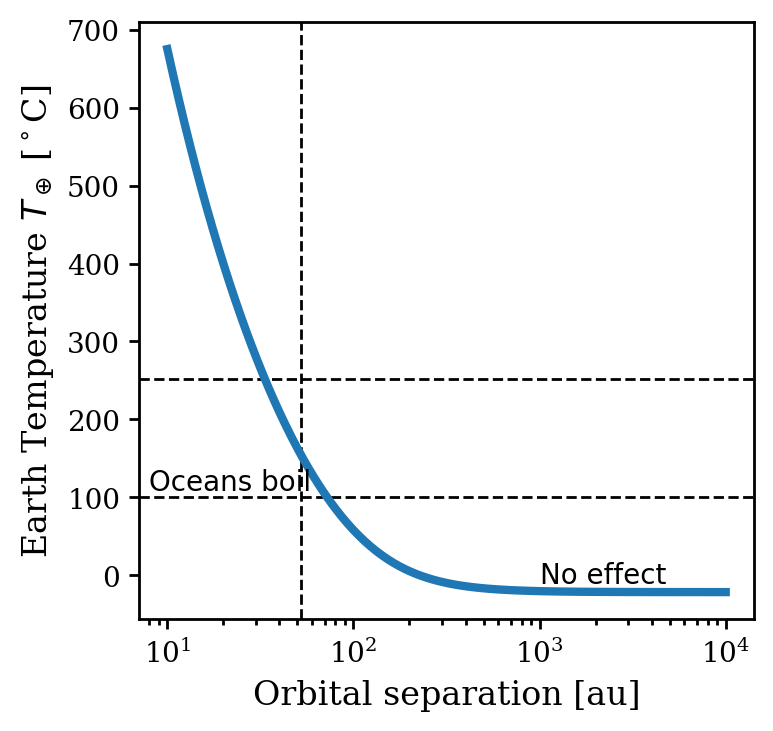

In [66]:
d2 = np.logspace(np.log10(10), 4, 100)
plt.plot(d2, Tearth(d2), lw=3)
plt.axhline(Tearth_0, ls='--', c='k', zorder=-99, lw=1)
plt.axhline(100, ls='--', c='k', zorder=-99, lw=1)
plt.axvline(52, ls='--', c='k', zorder=-99, lw=1)
plt.text(8, 110, 'Oceans boil', family='Sans')
plt.text(1e3, -10, 'No effect', family='Sans')
plt.semilogx()
plt.xlabel('Orbital separation [au]')
plt.ylabel(r'Earth Temperature $T_\oplus$ [$^\circ$C]')
plt.tight_layout()

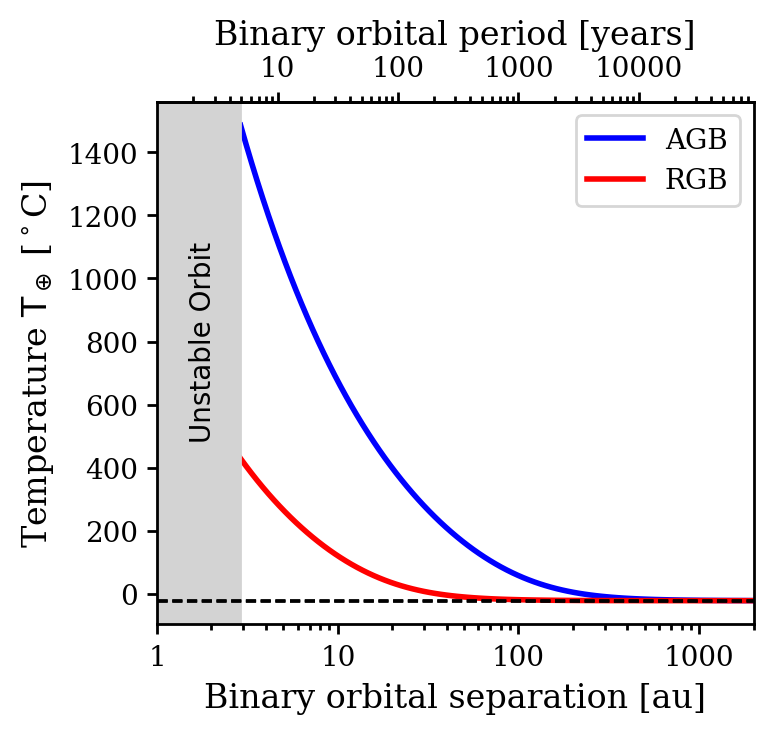

In [85]:
d2 = np.logspace(np.log10(2.9), 3.5, 100)
plt.plot(d2, Tearth(d2, 2*10**4), lw=2, c='blue', label='AGB', zorder=-9999)
plt.plot(d2, Tearth(d2, 5*10**2), lw=2, c='red', label='RGB', zorder=-9999)

plt.axvspan(1, 2.86, color='lightgray', zorder=-9)

plt.axhline(Tearth_0, ls='--', c='k', zorder=99, lw=1)
#plt.axhline(100, ls='--', c='k', zorder=99, lw=1)

plt.axhline(rg, ls='--', c='k', zorder=99, lw=1)

#plt.axhline(647-273.15, ls='--', c='k', zorder=99, lw=1)
#plt.axvline(74, ls='--', c='lightgray', zorder=-99, lw=1)
#plt.axvline(21.5, ls='--', c='lightgray', zorder=-99, lw=1)

#plt.text(1.8e3, 135, 'Oceans boil', family='Sans', ha='right')
#plt.text(1.8e3, 647-273.15+40, 'Runaway\ngreenhouse', family='Sans', ha='right')
plt.xlabel('Binary orbital separation [au]')
plt.ylabel(r'Temperature $\rm{T}_\oplus$ [$^\circ$C]')

plt.text(1.5, 500, 'Unstable Orbit', rotation=90, family='sans', zorder=9999)

plt.xlim([1, 2e3])
plt.semilogx()

plt.gca().set_xticks([1, 10, 100, 1000])
plt.gca().set_xticklabels(['1', '10', '100', '1000'])

ax = plt.gca()
def a_to_P(a):
    return a**1.5
def P_to_a(P):
    return P**(2/3)

secax = ax.secondary_xaxis('top', functions=(a_to_P, P_to_a))
secax.set_xlabel('Binary orbital period [years]')
secax.set_xscale('log') 
secax.set_xticks([10, 100, 1000, 10000])
secax.set_xticklabels(['10', '100', '1000', '10000'])

plt.legend()
plt.tight_layout()
plt.savefig('toplus.pdf')

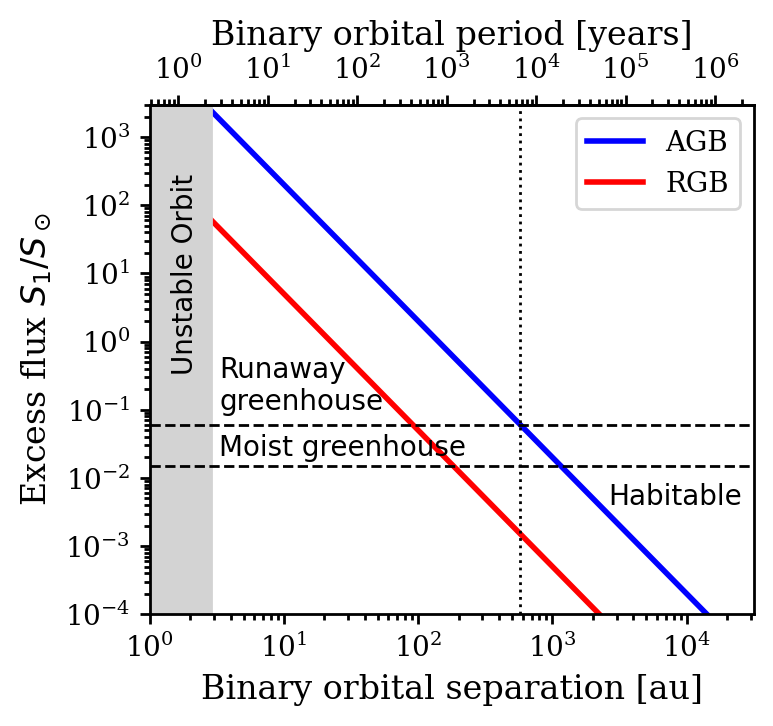

In [202]:
d2 = np.logspace(np.log10(2.9), 4.5, 100)
plt.plot(d2, S_excess(d2, 2*10**4), lw=2, c='blue', label='AGB', zorder=-9999)
plt.plot(d2, S_excess(d2, 5*10**2), lw=2, c='red', label='RGB', zorder=-9999)

plt.axvspan(1, 2.86, color='lightgray', zorder=-9)
plt.axhline(0.015, ls='--', c='k', zorder=99, lw=1)
plt.axhline(0.06, ls='--', c='k', zorder=99, lw=1)
plt.axvline(5.7e2, ls=':', c='k', zorder=99, lw=1)
plt.xlabel('Binary orbital separation [au]')
plt.ylabel(r'Excess flux $S_1/S_\odot$')

plt.text(3.3, 0.1, 'Runaway\ngreenhouse', family='sans', zorder=9999, ha='left')
plt.text(3.3, 2.1e-2, 'Moist greenhouse', family='sans', zorder=9999, ha='left')
plt.text(2.6e3, 4e-3, 'Habitable', family='sans', zorder=9999, ha='left')
plt.text(1.45, 0.4, 'Unstable Orbit', rotation=90, family='sans', zorder=9999)

plt.ylim([1e-4, 3e3])
plt.xlim([1, np.max(d2)])
plt.semilogx()
plt.semilogy()

ax = plt.gca()

M = 4.3  # total mass in Msun
def a_to_P(a):
    return a**1.5 / (M**0.5)
def P_to_a(P):
    return (P * (M**0.5))**(2/3)

secax = ax.secondary_xaxis('top', functions=(a_to_P, P_to_a))
secax.set_xlabel('Binary orbital period [years]')
secax.set_xscale('log') 

plt.legend()
plt.tight_layout()
plt.savefig('sexcess.pdf')

In [203]:
5.7e2

570.0

In [194]:
M = 1.77
a = 1400
P = a**1.5 / (M**0.5)
P

39373.626780825085

In [195]:
10**4

10000

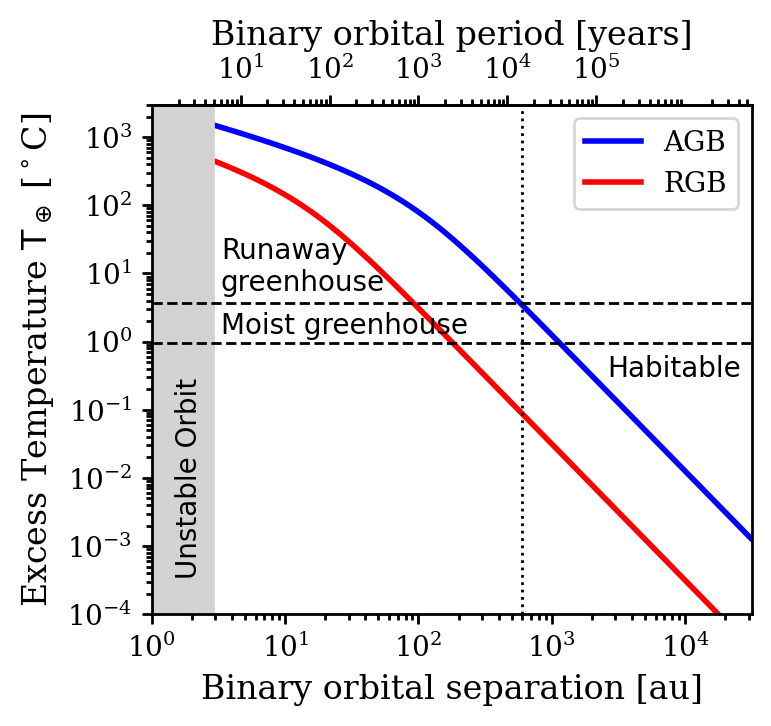

In [143]:
K = 273.15
d2 = np.logspace(np.log10(2.9), 4.5, 100)
plt.plot(d2, Tearth(d2, 2*10**4)-Tearth_0, lw=2, c='blue', label='AGB', zorder=-9999)
plt.plot(d2, Tearth(d2, 5*10**2)-Tearth_0, lw=2, c='red', label='RGB', zorder=-9999)

plt.axvspan(1, 2.86, color='lightgray', zorder=-9)
#plt.axhline(Tearth_0+K, ls='--', c='k', zorder=99, lw=1)
plt.axhline(rg-Tearth_0, ls='--', c='k', zorder=99, lw=1)
plt.axhline(mg-Tearth_0, ls='--', c='k', zorder=99, lw=1)
plt.axvline(6e2, ls=':', c='k', zorder=99, lw=1)
plt.xlabel('Binary orbital separation [au]')
plt.ylabel(r'Excess Temperature $\rm{T}_\oplus$ [$^\circ$C]')

plt.text(1.5, 4e-4, 'Unstable Orbit', rotation=90, family='sans', zorder=9999)
plt.text(3.3, 5.5, 'Runaway\ngreenhouse', family='sans', zorder=9999, ha='left')
plt.text(3.3, 1.3, 'Moist greenhouse', family='sans', zorder=9999, ha='left')
plt.text(2.6e3, 3e-1, 'Habitable', family='sans', zorder=9999, ha='left')

plt.ylim([1e-4, 3e3])
plt.xlim([1, np.max(d2)])
plt.semilogx()
plt.semilogy()

#plt.gca().set_xticks([1, 10, 100, 1000])
#plt.gca().set_xticklabels(['1', '10', '100', '1000'])

ax = plt.gca()
def a_to_P(a):
    return a**1.5
def P_to_a(P):
    return P**(2/3)

secax = ax.secondary_xaxis('top', functions=(a_to_P, P_to_a))
secax.set_xlabel('Binary orbital period [years]')
secax.set_xscale('log') 
secax.set_xticks([10, 100, 1000, 10000, 1e5])
#secax.set_xticklabels(['10', '100', '1000', '10000'])

plt.legend()
plt.tight_layout()
plt.savefig('toplus.pdf')

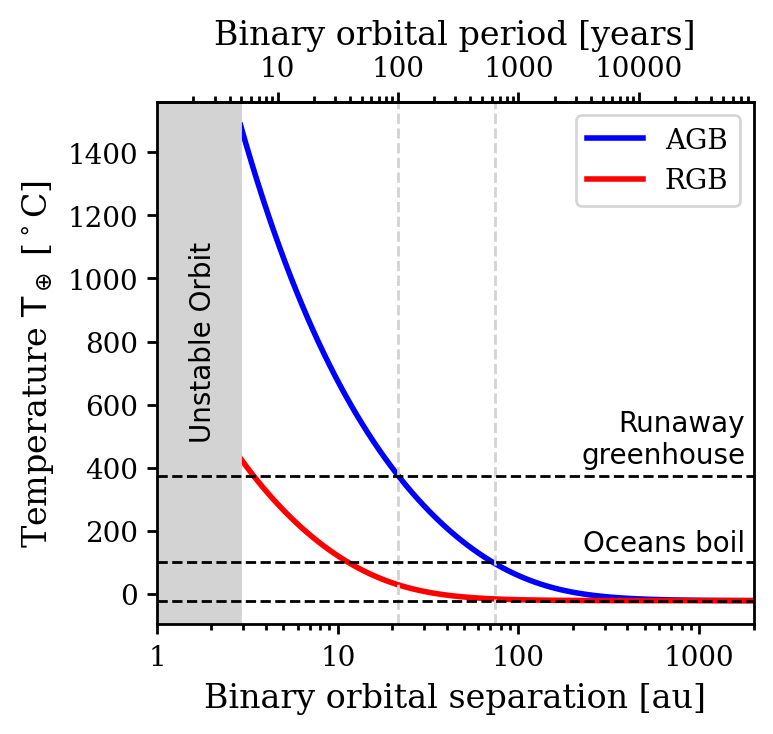

In [82]:
d2 = np.logspace(np.log10(2.9), 3.5, 100)
plt.plot(d2, Tearth(d2, 2*10**4), lw=2, c='blue', label='AGB', zorder=-9999)
plt.plot(d2, Tearth(d2, 5*10**2), lw=2, c='red', label='RGB', zorder=-9999)

#plt.axvline(2.86, ls='--', c='k', lw=1, zorder=9)
plt.axvspan(1, 2.86, color='lightgray', zorder=-9)

plt.axhline(Tearth_0, ls='--', c='k', zorder=99, lw=1)
plt.axhline(100, ls='--', c='k', zorder=99, lw=1)

plt.axhline(647-273.15, ls='--', c='k', zorder=99, lw=1)

#plt.axvline(11.5, ls='--', c='lightgray', zorder=-99, lw=1)
plt.axvline(74, ls='--', c='lightgray', zorder=-99, lw=1)
plt.axvline(21.5, ls='--', c='lightgray', zorder=-99, lw=1)

plt.text(1.8e3, 135, 'Oceans boil', family='Sans', ha='right')
#plt.text(1.9e3, 0, 'No effect', family='Sans', ha='right')
plt.text(1.8e3, 647-273.15+40, 'Runaway\ngreenhouse', family='Sans', ha='right')
plt.xlabel('Binary orbital separation [au]')
plt.ylabel(r'Temperature $\rm{T}_\oplus$ [$^\circ$C]')

plt.text(1.5, 500, 'Unstable Orbit', rotation=90, family='sans', zorder=9999)

plt.xlim([1, 2e3])
plt.semilogx()

#plt.gca().set_xticks([10, 100, 1000])
#plt.gca().set_xticklabels(['10', '100', '1000'])
plt.gca().set_xticks([1, 10, 100, 1000])
plt.gca().set_xticklabels(['1', '10', '100', '1000'])

ax = plt.gca()
def a_to_P(a):
    return a**1.5  # Convert orbital separation to period
def P_to_a(P):
    return P**(2/3)  # Convert period back to orbital separation

secax = ax.secondary_xaxis('top', functions=(a_to_P, P_to_a))
secax.set_xlabel('Binary orbital period [years]')
secax.set_xscale('log') 
secax.set_xticks([10, 100, 1000, 10000])
secax.set_xticklabels(['10', '100', '1000', '10000'])

plt.legend()
plt.tight_layout()
plt.savefig('toplus.pdf')

In [11]:
52**1.5

374.9773326482549